In [5]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


# Create PNG images

In [110]:
import os
from PIL import Image

def convert_ppm_to_png(base_dir, dir_names):
    for dir_name in dir_names:
        source_dir = os.path.join(base_dir, dir_name)
        target_dir = os.path.join(base_dir, f"{dir_name}_png")
        os.makedirs(target_dir, exist_ok=True)
        for filename in os.listdir(source_dir):
            if filename.endswith(".ppm"):
                source_file = os.path.join(source_dir, filename)
                target_file = os.path.join(target_dir, filename.replace(".ppm", ".png"))
                with Image.open(source_file) as img:
                    img.convert('RGB').save(target_file, "PNG")
                print(f"Converted {source_file} to {target_file}")
base_directory = '/Users/gman/Desktop/setup_for_traffic'
directories = ['fgsm_attack', 'gaussian_blur', 'pgd_attack']
convert_ppm_to_png(base_directory, directories)


Converted /Users/gman/Desktop/setup_for_traffic/fgsm_attack/06578.ppm to /Users/gman/Desktop/setup_for_traffic/fgsm_attack_png/06578.png
Converted /Users/gman/Desktop/setup_for_traffic/fgsm_attack/11004.ppm to /Users/gman/Desktop/setup_for_traffic/fgsm_attack_png/11004.png
Converted /Users/gman/Desktop/setup_for_traffic/fgsm_attack/01217.ppm to /Users/gman/Desktop/setup_for_traffic/fgsm_attack_png/01217.png
Converted /Users/gman/Desktop/setup_for_traffic/fgsm_attack/00109.ppm to /Users/gman/Desktop/setup_for_traffic/fgsm_attack_png/00109.png
Converted /Users/gman/Desktop/setup_for_traffic/fgsm_attack/09893.ppm to /Users/gman/Desktop/setup_for_traffic/fgsm_attack_png/09893.png
Converted /Users/gman/Desktop/setup_for_traffic/fgsm_attack/07666.ppm to /Users/gman/Desktop/setup_for_traffic/fgsm_attack_png/07666.png
Converted /Users/gman/Desktop/setup_for_traffic/fgsm_attack/08555.ppm to /Users/gman/Desktop/setup_for_traffic/fgsm_attack_png/08555.png
Converted /Users/gman/Desktop/setup_for_t

In [ ]:
# Conda Stuff stuff for terminal 
# https://github.com/swz30/MPRNet/tree/main

# conda create -n pytorch1 python=3.7
# conda activate pytorch1
# conda install pytorch=1.1 torchvision=0.3 cudatoolkit=9.0 -c pytorch
# pip install matplotlib scikit-image opencv-python yacs joblib natsort h5py tqdm
# cd pytorch-gradual-warmup-lr; python setup.py install; cd ..

In [ ]:
%cd /Users/gman/Desktop/setup_for_traffic/MPRNet
!python demo.py --task Denoising --input_dir ../pgd_attack_png/ --result_dir ../de-pgd_attack_png/

Files saved at ../de-pgd_attack_png/


In [12]:
!python demo.py --task Denoising --input_dir ../fgsm_attack_png/ --result_dir ../de-fgsm_attack_png/

Files saved at ../de-fgsm_attack_png/


In [1]:
# depth map estimation 
!pip install -q transformers

# Attempt to run Depth Map estimation

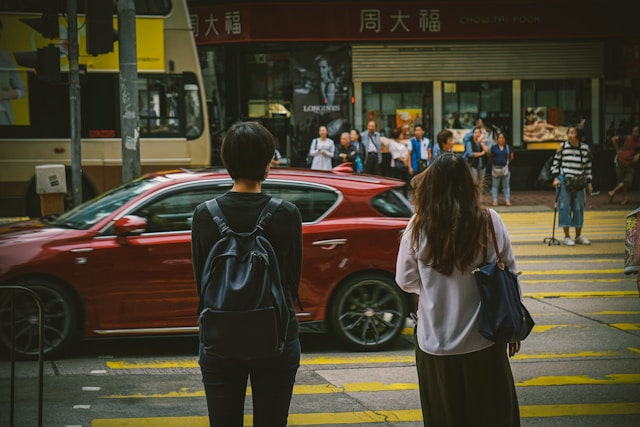

In [29]:
from PIL import Image
import requests

url = "https://unsplash.com/photos/HwBAsSbPBDU/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MzR8fGNhciUyMGluJTIwdGhlJTIwc3RyZWV0fGVufDB8MHx8fDE2Nzg5MDEwODg&force=true&w=640"
image = Image.open(requests.get(url, stream=True).raw)
image


In [31]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [32]:
print(image.size)

(640, 427)


In [33]:
from PIL import Image
import requests
image = Image.open("./Images_png/00109.png")
image.convert('RGB')
image

In [36]:
resized_image = image.resize((224, 224))
rgb_image = resized_image.convert("RGB")
predictions = depth_estimator(rgb_image)


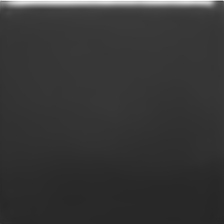

In [37]:
predictions["depth"]

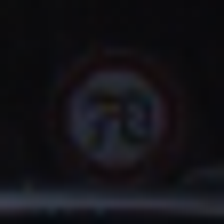

In [38]:
resized_image

# Light Enhancement (not contrast)

In [44]:
!git clone https://github.com/dblasko/low-light-event-img-enhancer.git

Cloning into 'low-light-event-img-enhancer'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 302 (delta 14), reused 15 (delta 6), pack-reused 267
Receiving objects: 100% (302/302), 7.83 MiB | 26.89 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [47]:
# %cd low-light-event-img-enhancer

/Users/gman/Desktop/setup_for_traffic/low-light-event-img-enhancer


In [48]:
# # light enhancement
# import torch
# import torchvision.transforms as T
# from PIL import Image
# from huggingface_hub import hf_hub_download
# from model.MIRNet.model import MIRNet

In [78]:
# # light enhancement
# import torch
# import torchvision.transforms as T
# from PIL import Image
# from huggingface_hub import hf_hub_download
# from model.MIRNet.model import MIRNet

# device = (
#     torch.device("cuda")
#     if torch.cuda.is_available()
#     else torch.device("mps")
#     if torch.backends.mps.is_available()
#     else torch.device("cpu")
# )

# model_path = hf_hub_download(
#     repo_id="dblasko/mirnet-low-light-img-enhancement", filename="mirnet_finetuned.pth"
# )

# model = MIRNet().to(device)
# model.load_state_dict(torch.load(model_path, map_location=device)["model_state_dict"])



<All keys matched successfully>

In [96]:

# model.eval()
# with torch.no_grad():
#     img = Image.open("./Images_png/00109.png").convert("RGB")
#     img_tensor = T.Compose(
#         [
#             T.Resize(400),
#             T.ToTensor(),
#             T.Normalize([0.0, 0.0, 0.0], [1.0, 1.0, 1.0]),
#         ]
#     )(img).unsqueeze(0)
#     img_tensor = img_tensor.to(device)

#     if img_tensor.shape[2] % 8 != 0:
#         img_tensor = img_tensor[:, :, : -(img_tensor.shape[2] % 8), :]
#     if img_tensor.shape[3] % 8 != 0:
#         img_tensor = img_tensor[:, :, :, : -(img_tensor.shape[3] % 8)]

#     output = model(img_tensor)

In [99]:
import torch
import torchvision.transforms as T
from PIL import Image


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img = Image.open("./Images_png/00684.png").convert("RGB")
transform = T.Compose([
    T.Resize(400),
    T.ToTensor(),
])
img_tensor = transform(img).unsqueeze(0)
img_tensor = img_tensor.to(device)

print(img_tensor)
image_np = img_tensor.squeeze().permute(1, 2, 0).cpu().numpy()
pil_image = Image.fromarray((image_np * 255).astype('uint8'))
pil_image.show()


tensor([[[[0.1412, 0.1412, 0.1412,  ..., 0.0784, 0.0784, 0.0784],
          [0.1412, 0.1412, 0.1412,  ..., 0.0784, 0.0784, 0.0784],
          [0.1412, 0.1412, 0.1412,  ..., 0.0784, 0.0784, 0.0784],
          ...,
          [0.1098, 0.1098, 0.1098,  ..., 0.1412, 0.1412, 0.1412],
          [0.1098, 0.1098, 0.1098,  ..., 0.1412, 0.1412, 0.1412],
          [0.1098, 0.1098, 0.1098,  ..., 0.1412, 0.1412, 0.1412]],

         [[0.1373, 0.1373, 0.1373,  ..., 0.0863, 0.0863, 0.0863],
          [0.1373, 0.1373, 0.1373,  ..., 0.0863, 0.0863, 0.0863],
          [0.1373, 0.1373, 0.1373,  ..., 0.0863, 0.0863, 0.0863],
          ...,
          [0.1020, 0.1020, 0.1020,  ..., 0.1176, 0.1176, 0.1176],
          [0.1020, 0.1020, 0.1020,  ..., 0.1176, 0.1176, 0.1176],
          [0.1020, 0.1020, 0.1020,  ..., 0.1176, 0.1176, 0.1176]],

         [[0.1451, 0.1451, 0.1451,  ..., 0.1098, 0.1098, 0.1098],
          [0.1451, 0.1451, 0.1451,  ..., 0.1098, 0.1098, 0.1098],
          [0.1451, 0.1451, 0.1451,  ..., 0

In [ ]:
img = Image.open("./Images_png/00109.png").convert("RGB")


# now do light enhancement on the entire folder

In [1]:
import os
import torch
import torchvision.transforms as T
from PIL import Image
from huggingface_hub import hf_hub_download
from model.MIRNet.model import MIRNet

device = (
    torch.device("cuda")
    if torch.cuda.is_available()
    else torch.device("cpu")
)

model_path = hf_hub_download(
    repo_id="dblasko/mirnet-low-light-img-enhancement", filename="mirnet_finetuned.pth"
)

model = MIRNet().to(device)
model.load_state_dict(torch.load(model_path, map_location=device)["model_state_dict"])
transform = T.Compose([
    T.Resize(400),  
    T.ToTensor(),

])

input_folder = "de-pgd_attack_png"
output_folder = "pgd_attack_png_light"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(input_folder):
    if filename.endswith(".png"):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to(device)
        if img_tensor.shape[2] % 8 != 0:
            img_tensor = img_tensor[:, :, : -(img_tensor.shape[2] % 8), :]
        if img_tensor.shape[3] % 8 != 0:
            img_tensor = img_tensor[:, :, :, : -(img_tensor.shape[3] % 8)]
        

        
        model.eval()
        with torch.no_grad():
            output = model(img_tensor)

        
        enhanced_image_np = output.squeeze().permute(1, 2, 0).cpu().numpy()
        enhanced_pil_image = Image.fromarray((enhanced_image_np * 255).astype('uint8'))
        enhanced_img_path = os.path.join(output_folder, filename)
        enhanced_pil_image.save(enhanced_img_path)


# Now instead increate the brightess of each image so it is the same for the entire folder:

In [102]:
import os
import numpy as np
from PIL import Image

input_folder = "de-pgd_attack_png"
total_brightness = 0
total_images = 0
for filename in os.listdir(input_folder):
    if filename.endswith(".png"):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path).convert("L")
        brightness = np.mean(np.array(img))
        total_brightness += brightness
        total_images += 1
target_brightness = total_brightness / total_images
output_folder = "pgd_attack_png_light"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for filename in os.listdir(input_folder):
    if filename.endswith(".png"):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        img_gray = img.convert("L")
        current_brightness = np.mean(np.array(img_gray))
        adjustment_factor = target_brightness / current_brightness
        img_brightness_adjusted = Image.eval(img, lambda x: min(255, x * adjustment_factor))
        output_path = os.path.join(output_folder, filename)
        img_brightness_adjusted.save(output_path)


In [10]:
%cd /Users/gman/Desktop/setup_for_traffic

/Users/gman/Desktop/setup_for_traffic


# Contrast Enhancement

In [11]:
import cv2 as cv
import os

def contrast_enhance(img):
    img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
    L, a, b = cv.split(img_lab)
    L = cv.equalizeHist(L)
    img_lab_merge = cv.merge((L, a, b))
    return cv.cvtColor(img_lab_merge, cv.COLOR_Lab2BGR)

output_folder = 'de-gaussian_blur_png_light'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

input_folder = 'de-gaussian_blur_png'


for filename in os.listdir(input_folder):
    if filename.endswith('.png'):
        img_path = os.path.join(input_folder, filename)
        img = cv.imread(img_path)
        enhanced_img = contrast_enhance(img)
        output_path = os.path.join(output_folder, filename)
        cv.imwrite(output_path, enhanced_img)
        print(f'{filename} processed and saved.')


06796.png processed and saved.
08963.png processed and saved.
03836.png processed and saved.
00481.png processed and saved.
12091.png processed and saved.
08787.png processed and saved.
02533.png processed and saved.
09466.png processed and saved.
08778.png processed and saved.
12046.png processed and saved.
02255.png processed and saved.
00456.png processed and saved.
06027.png processed and saved.
06741.png processed and saved.
09472.png processed and saved.
10123.png processed and saved.
02527.png processed and saved.
05260.png processed and saved.
02269.png processed and saved.
01012.png processed and saved.
00683.png processed and saved.
12287.png processed and saved.
07852.png processed and saved.
04397.png processed and saved.
02080.png processed and saved.
10484.png processed and saved.
09843.png processed and saved.
02916.png processed and saved.
00873.png processed and saved.
03349.png processed and saved.
12244.png processed and saved.
09102.png processed and saved.
11995.pn

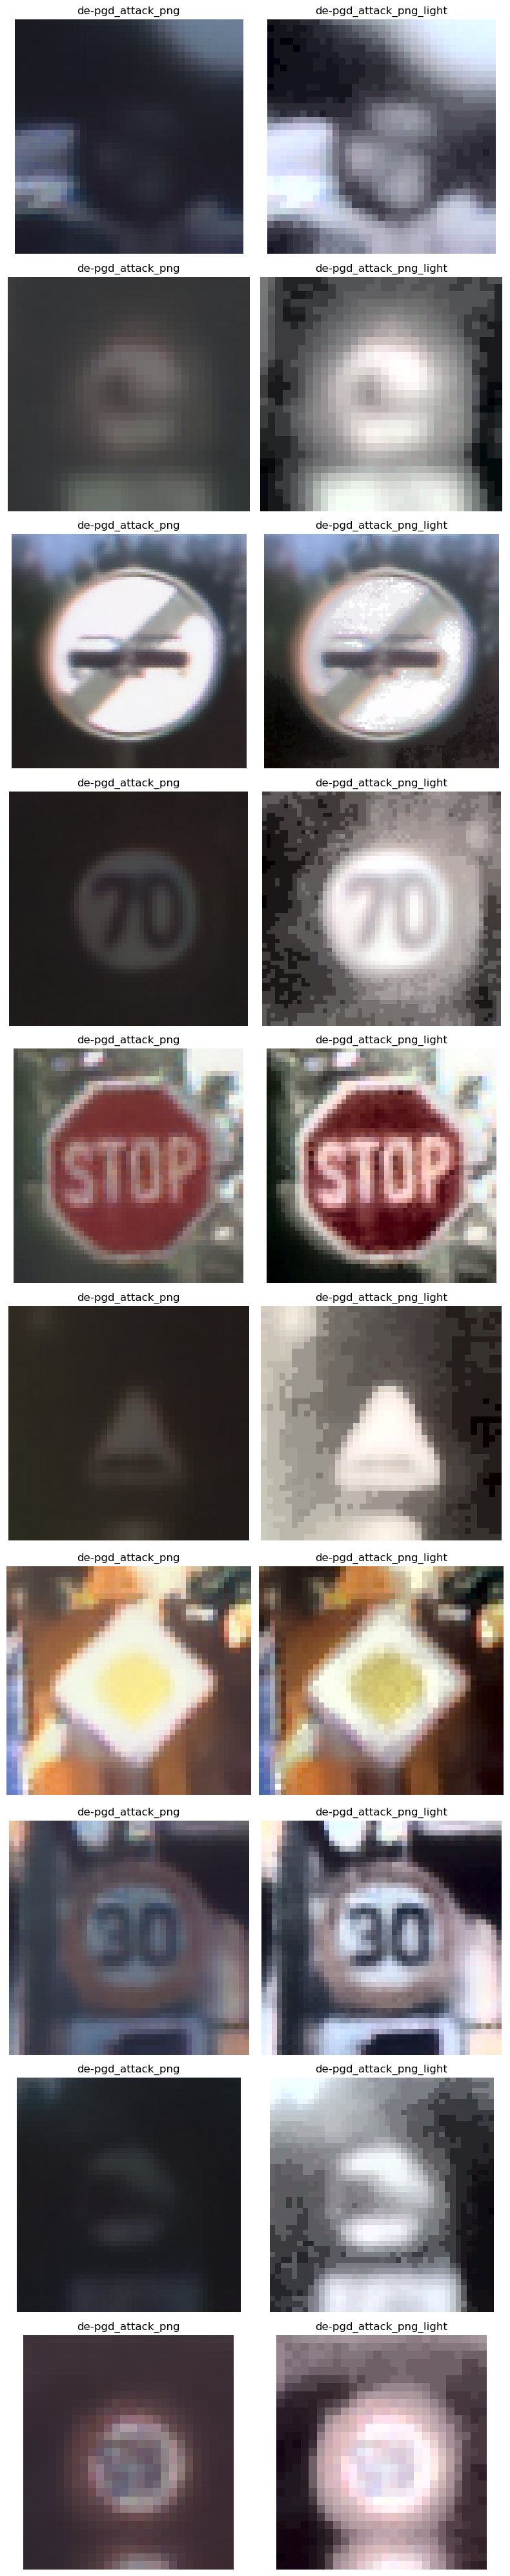

In [108]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_images(folder_names, filenames):
    num_folders = len(folder_names)
    num_images = len(filenames)
    
    fig, axs = plt.subplots(num_images, num_folders, figsize=(num_folders*4, num_images*4))
    for i, filename in enumerate(filenames):
        for j, folder_name in enumerate(folder_names):
            img_path = os.path.join(folder_name, filename)
            img = Image.open(img_path)
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(folder_name)
    plt.tight_layout()
    plt.show()

folder_names = ['de-pgd_attack_png', 'de-pgd_attack_png_light']
filenames = os.listdir(folder_names[0])
random.shuffle(filenames)
filenames = filenames[:10]
plot_images(folder_names, filenames)

# Image Quality Enhancement (Failed)

In [65]:
%cd /Users/gman/Desktop/setup_for_traffic/

/Users/gman/Desktop/setup_for_traffic


In [66]:
!git clone https://github.com/XPixelGroup/HAT.git

Cloning into 'HAT'...
remote: Enumerating objects: 416, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 416 (delta 195), reused 120 (delta 120), pack-reused 175
Receiving objects: 100% (416/416), 20.72 MiB | 36.90 MiB/s, done.
Resolving deltas: 100% (230/230), done.


In [68]:
%cd HAT/

/Users/gman/Desktop/setup_for_traffic/HAT


In [69]:
!pip install -r requirements.txt
!python setup.py develop

  Obtaining dependency information for einops from https://files.pythonhosted.org/packages/29/0b/2d1c0ebfd092e25935b86509a9a817159212d82aa43d7fb07eca4eeff2c2/einops-0.7.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 119.4 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for addict from https://files.pythonhosted.org/packages/6a/00/b08f23b7d7e1e14ce01419a467b583edbb93c6cdb8654e54a9cc579cd61f/addict-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for future from https://files.pythonhosted.org/packages/da/71/ae30dadffc90b9006d77af76b393cb9dfbfc9629f339fc1574a1c52e6806/future-1.0.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.5/881.5 kB 162.3 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f

In [2]:

import os
from PIL import Image

source_directory = '/Users/gman/Desktop/setup_for_traffic/blur_arti/blur'
output_directory = '/Users/gman/Desktop/setup_for_traffic/blur_arti/blur_ppm'
os.makedirs(output_directory, exist_ok=True)
for filename in os.listdir(source_directory):
    if filename.endswith(".png"):
        file_path = os.path.join(source_directory, filename)
        with Image.open(file_path) as img:    
            output_filename = os.path.splitext(filename)[0] + '.ppm'
            output_path = os.path.join(output_directory, output_filename)
            img.save(output_path, 'PPM')

print("Conversion complete.")


Conversion complete.


Original


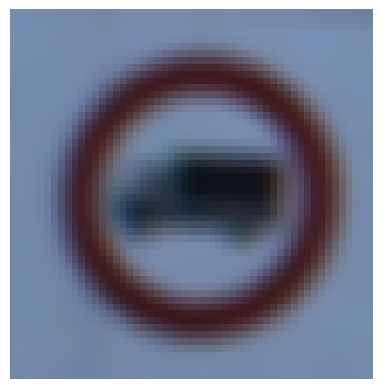

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

def visualize_ppm(filename):
    """
    Loads and visualizes a PPM image.
    
    Args:
        filename (str): The path to the PPM image file.
    """
    image = Image.open(filename)
    plt.imshow(image)
    plt.axis('off') 
    plt.show()
print("Original")
'/Users/gman/Desktop/setup_for_traffic/blur_arti/blur_ppm'

visualize_ppm('/Users/gman/Desktop/setup_for_traffic/blur_arti/blur_ppm/00000.ppm')




In [71]:
!python hat/test.py -opt options/test/HAT_SRx4_ImageNet-pretrain.yml


^C
Traceback (most recent call last):
  File "/Users/gman/Desktop/setup_for_traffic/HAT/hat/test.py", line 4, in <module>
    import hat.archs
  File "/Users/gman/Desktop/setup_for_traffic/HAT/hat/__init__.py", line 2, in <module>
    from .archs import *
  File "/Users/gman/Desktop/setup_for_traffic/HAT/hat/archs/__init__.py", line 4, in <module>
    from basicsr.utils import scandir
  File "/Users/gman/anaconda3/envs/tensorflow/lib/python3.10/site-packages/basicsr/__init__.py", line 6, in <module>
    from .metrics import *
  File "/Users/gman/anaconda3/envs/tensorflow/lib/python3.10/site-packages/basicsr/metrics/__init__.py", line 4, in <module>
    from .niqe import calculate_niqe
  File "/Users/gman/anaconda3/envs/tensorflow/lib/python3.10/site-packages/basicsr/metrics/niqe.py", line 5, in <module>
    from scipy.ndimage.filters import convolve
  File "/Users/gman/anaconda3/envs/tensorflow/lib/python3.10/site-packages/scipy/ndimage/__init__.py", line 152, in <module>
    from ._fi

# Filter Desired Classes

In [ ]:
# copy only the images from the following classes: 
desired_clasees =[0,1,2,11,12,14,16,28,34,35,39]

In [5]:
import pandas as pd
df = pd.read_csv('GT-final_test.csv',  delimiter=';')
print(df.columns)
desired_classes = [0, 1, 2, 11, 12, 14, 16, 28, 34, 35, 39]
filtered_df = df[df['ClassId'].isin(desired_classes)]
filtered_df.to_csv('filtered_GT-final_test.csv', index=False)

Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')


In [2]:
import os
import pandas as pd
import shutil

base_dir = 'all_images'
csv_file = 'filtered_GT-final_test.csv'
df = pd.read_csv(csv_file)
attack_types = ['fgsm_attack', 'gaussian_blur', 'pgd_attack']
for attack in attack_types:
    src_dir = os.path.join(base_dir, 'ppm', attack)
    dest_dir = os.path.join(base_dir, 'ppm', f'{attack}_clean')
    os.makedirs(dest_dir, exist_ok=True)
    for index, row in df.iterrows():
        filename = row['Filename']
        src_file = os.path.join(src_dir, filename)
        dest_file = os.path.join(dest_dir, filename)
        if os.path.isfile(src_file):
            shutil.copy(src_file, dest_file)
        else:
            print(f"File not found: {src_file}")



In [13]:
import os
import pandas as pd
import shutil
base_dir = 'all_images'
csv_file = 'filtered_GT-final_test.csv'
df = pd.read_csv(csv_file)
df['Filename'] = df['Filename'].str.replace('.ppm', '', regex=False)
png_dir = os.path.join(base_dir, 'png')
subfolders = [f.name for f in os.scandir(png_dir) if f.is_dir()]
for folder in subfolders:
    src_dir = os.path.join(png_dir, folder)
    dest_dir = os.path.join(png_dir, f'{folder}_clean')
    os.makedirs(dest_dir, exist_ok=True)
    for image in os.listdir(src_dir):
        if image.endswith('.png'):
            image_base = image.replace('.png', '')
            if image_base in df['Filename'].values:
                src_file = os.path.join(src_dir, image)
                dest_file = os.path.join(dest_dir, image)
                shutil.copy(src_file, dest_file)

print("Files have been copied to the respective clean folders.")


Files have been copied to the respective clean folders.


In [15]:
%cd /Users/gman/Desktop/setup_for_traffic/all_images/png_clean

/Users/gman/Desktop/setup_for_traffic/all_images/png_clean


# Comvert PNG to PPM

In [3]:
import os
from PIL import Image

base_dir = os.getcwd()
subfolders = [f.name for f in os.scandir(base_dir) if f.is_dir()]
for folder in subfolders:
    src_dir = os.path.join(base_dir, folder)
    dest_dir = os.path.join(base_dir, f'{folder}_ppm')
    os.makedirs(dest_dir, exist_ok=True)
    for file in os.listdir(src_dir):
        if file.endswith('.png'):
            file_path = os.path.join(src_dir, file)
            img = Image.open(file_path)
            ppm_path = os.path.join(dest_dir, file.replace('.png', '.ppm'))
            img.save(ppm_path, 'PPM')


In [26]:
import os
import pandas as pd

image_dir = '/Users/gman/Desktop/setup_for_traffic/all_images/processed/ppm_clean/original_images'
csv_file = '/Users/gman/Desktop/setup_for_traffic/filtered_GT-final_test.csv'
df = pd.read_csv(csv_file)
keep_files = set(df['Filename'].values) 
all_files = os.listdir(image_dir)
for file in all_files:
    if file not in keep_files:
        file_path = os.path.join(image_dir, file)
        os.remove(file_path)  

print("Filtering complete. Only the images listed in the CSV have been kept.")


Filtering complete. Only the images listed in the CSV have been kept.


In [ ]:
baseline_original_images,
baseline_gaussian_blur,
baseline_fgsm_attack,
baseline_pgd_attack,             

de-gaussian_blur,
de-fgsm_attack,
de-pgd_attack,

de-fgsm_attack_light,
de-pgd_attack_light
de-gaussian_blur_light,


# Experimeting with different approaches of how to use canny for guiding classification

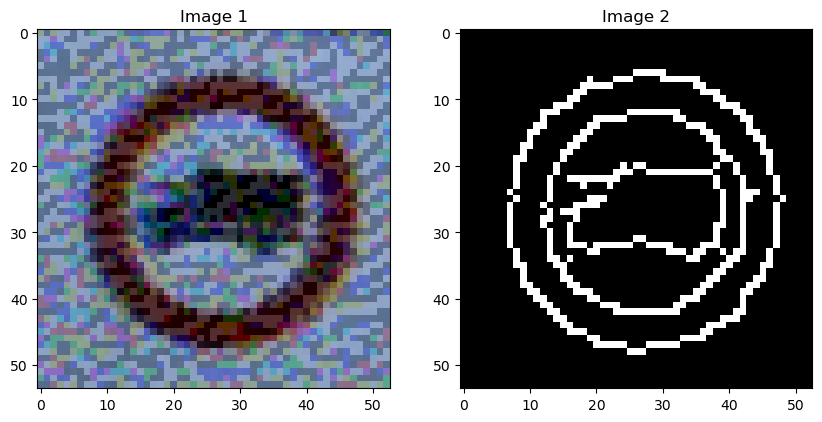

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

img1_path = '/Users/gman/Desktop/setup_for_traffic/temp/00000.png'
img2_path = '/Users/gman/Desktop/setup_for_traffic/temp_output/temp_putput/00000.png'

img1 = mpimg.imread(img1_path)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE) 
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.imshow(img2,cmap='gray')
plt.title('Image 2')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


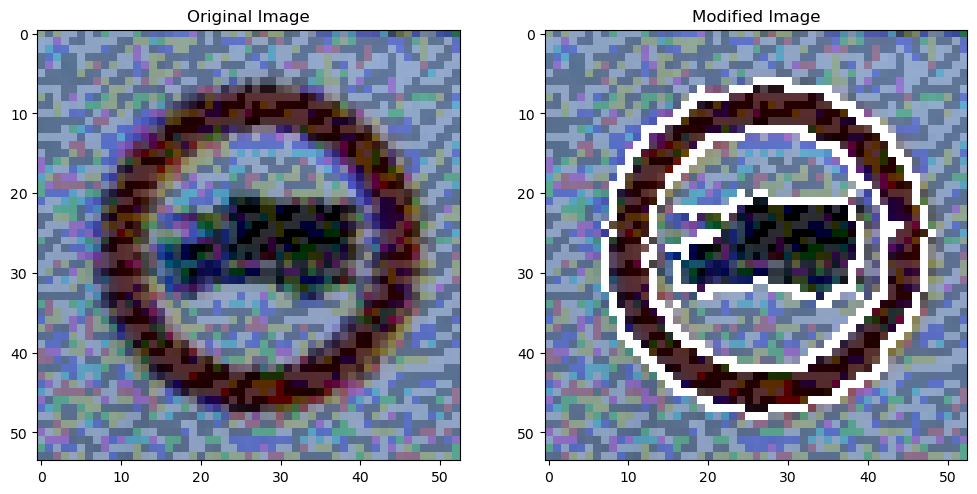

In [7]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img1_path = '/Users/gman/Desktop/setup_for_traffic/temp/00000.png'
img2_path = '/Users/gman/Desktop/setup_for_traffic/temp_output/temp_putput/00000.png'

img1 = mpimg.imread(img1_path)
img2_gray = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)  
_, img2_thresholded = cv2.threshold(img2_gray, 240, 255, cv2.THRESH_BINARY)
img1_modified = np.copy(img1)
for y in range(img2_thresholded.shape[0]):
    for x in range(img2_thresholded.shape[1]):
        if img2_thresholded[y, x] == 255: 
            img1_modified[y, x] = [255, 255, 255]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img1_modified)
plt.title('Modified Image')
plt.show()


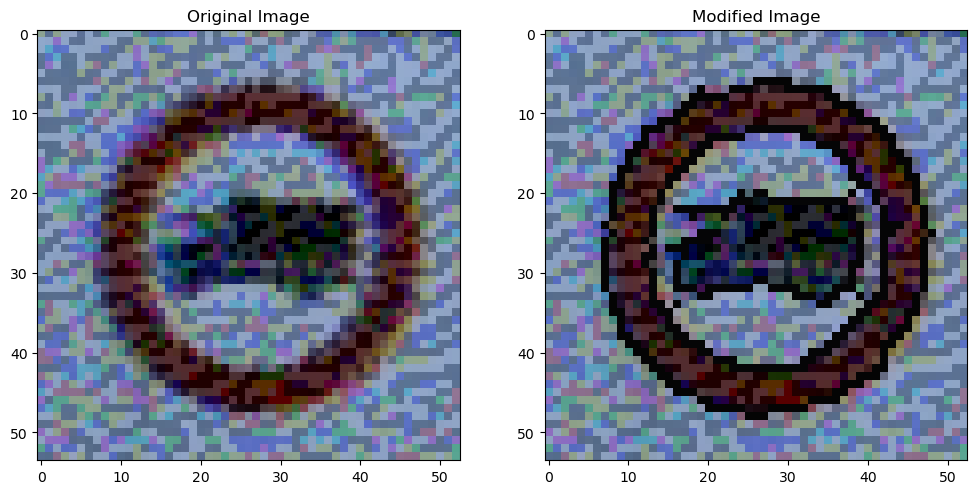

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def find_connected_components(image):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8)
    return num_labels, labels, stats, centroids
img1_path = '/Users/gman/Desktop/setup_for_traffic/temp/00000.png'
img2_path = '/Users/gman/Desktop/setup_for_traffic/temp_output/temp_putput/00000.png'

img1 = cv2.imread(img1_path)
img2_gray = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
_, img2_thresholded = cv2.threshold(img2_gray, 240, 255, cv2.THRESH_BINARY)
num_labels, labels, stats, centroids = find_connected_components(img2_thresholded)
img1_modified = np.copy(img1)
for label in range(1, num_labels): 
    component_mask = (labels == label).astype(np.uint8)
    component_pixels = cv2.bitwise_and(img1, img1, mask=component_mask)
    avg_color = np.mean(component_pixels, axis=(0, 1)).astype(np.uint8)
    img1_modified = np.where(component_mask[..., None], avg_color, img1_modified)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img1_modified, cv2.COLOR_BGR2RGB))
plt.title('Modified Image')

plt.show()


In [1]:
!conda init
!conda create -n pytorch1 python=3.7
!conda activate pytorch1
!conda install pytorch=1.1 torchvision=0.3 cudatoolkit=9.0 -c pytorch
!pip install matplotlib scikit-image opencv-python yacs joblib natsort h5py tqdm
!cd pytorch-gradual-warmup-lr; python setup.py install; cd ..

no change     /Users/gman/anaconda3/condabin/conda
no change     /Users/gman/anaconda3/bin/conda
no change     /Users/gman/anaconda3/bin/conda-env
no change     /Users/gman/anaconda3/bin/activate
no change     /Users/gman/anaconda3/bin/deactivate
no change     /Users/gman/anaconda3/etc/profile.d/conda.sh
no change     /Users/gman/anaconda3/etc/fish/conf.d/conda.fish
no change     /Users/gman/anaconda3/shell/condabin/Conda.psm1
no change     /Users/gman/anaconda3/shell/condabin/conda-hook.ps1
no change     /Users/gman/anaconda3/lib/python3.11/site-packages/xontrib/conda.xsh
no change     /Users/gman/anaconda3/etc/profile.d/conda.csh
no change     /Users/gman/.bash_profile
No action taken.
Channels:
 - defaults
Platform: osx-arm64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - python=3.7*

Current channels:

  - defaults

To search for alternate channels that may provide the conda package you're
looking for, naviga